<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
    <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/Part%204-Clustering/4-2-dbscan%20algorithm.ipynb" target="_blank">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    </a>
        <a href="https://www.youtube.com/watch?v=RDZUdRSDOok" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="KMeans Youtube Video" style="height: 40px;">
    </a>
</div>

#### 1. **Introduction to DBSCAN**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a density-based clustering algorithm used to identify clusters in datasets based on the density of data points. It is particularly useful for discovering clusters of arbitrary shape and handling noise (outliers).

Unlike K-Means, DBSCAN does not require specifying the number of clusters in advance and can identify outliers as points that do not belong to any cluster.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-1.png" alt="DBSCAN Algorithm" width="600"/>
</div>

---

#### 2. **How DBSCAN Works**

DBSCAN groups points that are closely packed together, marking as outliers points that lie alone in low-density regions. It works based on two key parameters:
- **Epsilon ($ \epsilon $)**: The maximum distance between two points for them to be considered as part of the same neighborhood.
- **MinPoints**: The minimum number of points required to form a dense region (i.e., a cluster).

Key concepts in DBSCAN:
- **Core Point**: A point with at least MinPoints within a radius $ \epsilon $.
- **Border Point**: A point that has fewer than MinPoints within $ \epsilon $, but is in the neighborhood of a core point.
- **Noise Point (Outlier)**: A point that is neither a core nor a border point.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-2.png" alt="DBSCAN Algorithm" width="600"/>
</div>

**DBSCAN Steps**:<br>
i. For each point in the dataset, identify its neighborhood based on $ \epsilon $ and MinPoints.<br>
ii. If a point is a core point, form a cluster around it and recursively expand the cluster by including all density-reachable points.<br>
iii. Continue until all points have been visited, and label remaining points that do not belong to any cluster as noise.<br>

DBSCAN creates clusters by iteratively adding points that are density-reachable from core points.

 <div style="display: flex; justify-content: flex-start; align-items: center;">
   DBSCAN in Action
  <a href="https://www.youtube.com/watch?v=h53WMIImUuc" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="DBSCAN Youtube Video" style="height: 40px;margin-left: 20px;">
    </a>
</div>

##### Here is a detailed example showing the calculations performed by the algorithm:

**i. Compute the Distance for Each Point**

- In this step, we compute the Euclidean distances between all points in the dataset, creating a **lower triangular distance matrix**.
- Each cell in the matrix represents the distance between two points, while the diagonal is excluded since it represents the distance of a point to itself.
This matrix forms the basis for identifying the neighbors of each point within the epsilon (ε = 1.9) radius. 
    

| Points         | P1   | P2   | P3   | P4   | P5   | P6   | P7   | P8   | P9   | P10  | P11  | P12  |
|----------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| P1: (3,7)     |       |       |       |       |       |       |       |       |       |       |       |       |
| P2: (4,6)     | 1.41  |       |       |       |       |       |       |       |       |       |       |       |
| P3: (5,5)     | 2.83  | 1.41  |       |       |       |       |       |       |       |       |       |       |
| P4: (6,4)     | 4.24  | 2.83  | 1.41  |       |       |       |       |       |       |       |       |       |
| P5: (7,3)     | 5.66  | 4.24  | 2.83  | 1.41  |       |       |       |       |       |       |       |       |
| P6: (6,2)     | 5.83  | 4.47  | 3.16  | 2.24  | 1.00  |       |       |       |       |       |       |       |
| P7: (7,2)     | 6.40  | 5.00  | 3.61  | 2.24  | 1.00  | 1.00  |       |       |       |       |       |       |
| P8: (8,4)     | 5.83  | 4.47  | 3.16  | 2.24  | 1.41  | 2.24  | 1.41  |       |       |       |       |       |
| P9: (3,3)     | 5.00  | 4.24  | 3.16  | 3.16  | 4.12  | 3.00  | 3.16  | 4.47  |       |       |       |       |
| P10: (2,6)    | 1.41  | 2.00  | 3.16  | 4.24  | 5.39  | 5.83  | 6.40  | 6.32  | 3.00  |       |       |       |
| P11: (3,5)    | 2.00  | 1.41  | 2.00  | 3.16  | 4.24  | 4.47  | 5.00  | 4.47  | 2.24  | 1.00  |       |       |
| P12: (2,4)    | 3.16  | 2.83  | 3.16  | 4.00  | 5.10  | 5.39  | 5.83  | 5.10  | 2.00  | 2.00  | 1.41  |   0   |





**ii. Count the Number of Neighbors for Each Point**

- After computing the distances for each point, we list the neighbors of each point within the ε = 1.9 radius and counting them. 
- This information will be used to classify points as following:
    - a core point requires at least 4 neighbors
    - a border point is connected to a core point but has fewer than 4 neighbors
    - noise points which are the nodes that has not no neighbors
- For example:
    - P1 has neighbors P2 and P10, as seen in the the table below. 
    - P5 has 4 neighbors (P4, P6, P7, P8), while P8 has only 1 neighbor (P5) and P9 has no neighbors.

| Point        | Neighbors (ε=1.9)       | # Neighbors |
|--------------|--------------------------|-------------|
| P1: (3,7)    | P2, P10                 | 2           |
| P2: (4,6)    | P1, P3, P10, P11        | 4           |
| P3: (5,5)    | P2, P4                  | 2           |
| P4: (6,4)    | P3, P5                  | 2           |
| P5: (7,3)    | P4, P6, P7, P8          | 4           |
| P6: (6,2)    | P5, P7                  | 2           |
| P7: (7,2)    | P5, P6                  | 2           |
| P8: (8,4)    | P5                      | 1           |
| P9: (3,3)    | -                       | 0           |
| P10: (2,6)   | P1, P2, P11             | 3           |
| P11: (3,5)   | P2, P10, P12            | 3           |
| P12: (2,4)   | P9, P11                 | 2           |

**iii. Classify Points into Core, Border or Noise**

In this step, we classify each point in the dataset as either **Core, Border, or Noise based on the number of neighbors within the epsilon (ε = 1.9) radius**:

a. **Core Points**: Points that have at least 4 neighbors within the ε radius. For example:
   - **P2** is a core point because it has 4 neighbors: P1, P3, P10, and P11.
   - **P5** is a core point because it has 4 neighbors: P4, P6, P7, and P8.

b. **Border Points**: Points that have fewer than 4 neighbors but are within the ε radius of at least one core point. For example:
   - **P1** is a border point because it has only 2 neighbors (P2 and P10) but is connected to the core point P2.
   - **P11** is a border point because it has 3 neighbors (P2, P10, and P12) and is connected to the core point P2.

c. **Noise Points**: Points that have no neighbors within the ε radius and are not connected to any core point. For example:
   - **P9** is classified as noise because it has no neighbors.

This step ensures that each point is categorized appropriately, which is essential for defining the clusters in the DBSCAN algorithm. Core points form the dense regions of clusters, border points connect to these dense regions, and noise points are outliers.

| Point        | Neighbors (ε=1.9)       | Status  |
|--------------|--------------------------|---------|
| P1: (3,7)    | P2, P10                 | Border  |
| P2: (4,6)    | P1, P3, P10, P11        | **Core**    |
| P3: (5,5)    | P2, P4                  | Border  |
| P4: (6,4)    | P3, P5                  | Border  |
| P5: (7,3)    | P4, P6, P7, P8          | **Core**    |
| P6: (6,2)    | P5, P7                  | Border  |
| P7: (7,2)    | P5, P6                  | Border  |
| P8: (8,4)    | P5                      | Border  |
| P9: (3,3)    | -                       | Noise   |
| P10: (2,6)   | P1, P2, P11             | Border  |
| P11: (3,5)   | P2, P10, P12            | Border  |
| P12: (2,4)   | P9, P11                 | Border  |


As demonstrated by the table above, the DBSCAN algorithm identified **two clusters** and **one noise point** based on the parameters `ε = 1.9` and `minPts = 4`:

- **Cluster 0**: Includes points P1, P2, P3, P10, P11, and P12. These points form a dense region in the upper-left area of the diagram.
- **Cluster 1**: Includes points P4, P5, P6, P7, and P8. This cluster represents another dense region in the lower-right part of the diagram.
- **Noise Point**: P9 is classified as noise because it does not have any neighbors within the ε radius and is not connected to any core point. It is treated as an outlier.

#### Visualize the Clusters using a Scatter Plot

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-clusters.png" alt="DBSCAN Algorithm" width="600"/>
</div>

The scatter plot visually demonstrates the clustering results:

- **Clusters**:
  - Cluster 0 is represented by one color (e.g., red) and primarily occupies the upper-left region.
  - Cluster 1 is represented by another color (e.g., orange) and spans the lower-right region.
- **Noise Point**:
  - P9 is marked in black, clearly showing that it is isolated and does not belong to any cluster.

---

#### 3. **DBSCAN in Python**

#### Python - Example 1

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Step 1: Define the dataset
points = np.array([
    [3, 7],  # P1
    [4, 6],  # P2
    [5, 5],  # P3
    [6, 4],  # P4
    [7, 3],  # P5
    [6, 2],  # P6
    [7, 2],  # P7
    [8, 4],  # P8
    [3, 3],  # P9
    [2, 6],  # P10
    [3, 5],  # P11
    [2, 4],  # P12
])

# Step 2: Set DBSCAN parameters
epsilon = 1.9
min_pts = 4

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
labels = dbscan.fit_predict(points)

# Create a DataFrame to hold the points and their cluster labels
df = pd.DataFrame(points, columns=['X1', 'X2'])
df['Cluster'] = labels  # Add cluster labels to the DataFrame
df

,X1,X2,Cluster
0,3,7,0
1,4,6,0
2,5,5,0
3,6,4,1
4,7,3,1
5,6,2,1
6,7,2,1
7,8,4,1
8,3,3,-1
9,2,6,0


##### Plot the Clusters

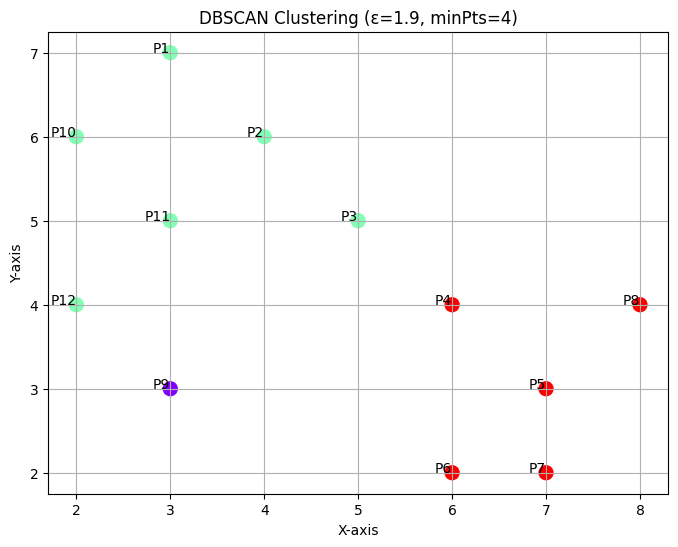

In [33]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['X2'], c=df['Cluster'], cmap='rainbow', marker='o', s=100)
plt.title(f'DBSCAN Clustering (ε={epsilon}, minPts={min_pts})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Annotate points
for i, (x, y) in enumerate(zip(df['X1'], df['X2'])):
    plt.text(x, y, f'P{i+1}', fontsize=10, ha='right')

plt.grid(True)
plt.show()


##### Explanation of the Code:
1. **Dataset Creation**: The `points` array defines the dataset with coordinates for each point (e.g., P1 = (3,7), P2 = (4,6)).
2. **DBSCAN Implementation**:
   - The `DBSCAN` class from `sklearn.cluster` is used with `eps=1.9` (ε) and `min_samples=4` (minPts).
   - The `fit_predict()` method clusters the data and assigns labels to each point.
3. **Printing Results**:
   - Each point's cluster label is printed, with noise points labeled as `Noise`.
4. **Visualization**:
   - The scatter plot shows the clusters with distinct colors and noise points in black. Annotations (P1, P2, etc.) make it easy to identify each point.

---

#### 4. **Advantages and Disadvantages of DBSCAN**

**Advantages**:
- Does not require specifying the number of clusters in advance.
- Can find arbitrarily shaped clusters.
- Identifies outliers as noise points.
  
**Disadvantages**:
- Performance depends on choosing appropriate values for $ \epsilon $ and MinPoints.
- Struggles with varying densities of clusters.
- High-dimensional data can make it difficult to choose $ \epsilon $.